# Computer Assignment 5 : Neural Network
Mahsa Hemmatpanah-810199584


## Description :
In this computer assignment, we want to classify given photos from handwritten persian number into ten classes using Neural Netwoks that we learnt in Artificial Intelligence. We will build our neural network from scratch using method of NumPy library.

In [306]:
from sklearn.model_selection import train_test_split
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from sklearn import preprocessing
from sklearn.utils import shuffle

# Phase 1

In [307]:
pkl_file = open('dataset/data.pkl', 'rb')
data = pickle.load(pkl_file)

In [308]:
pkl_file = open('dataset/labels.pkl', 'rb')
label = pickle.load(pkl_file)

In [309]:
train_x, test_x, train_y, test_y = train_test_split(data, label, test_size=0.3, stratify=label)

1


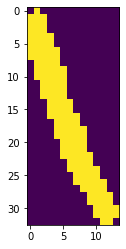

Max = 255
Min = 0


In [251]:
choice = random.randint(0, len(train_x))
random_data = train_x[choice]
print(train_y[choice])
plt.imshow(random_data)
plt.show()
print(f'Max = {random_data.max()}')
print(f'Min = {random_data.min()}')

In [310]:
for i in range(len(train_x)):
    train_x[i] = cv2.resize(train_x[i], (25, 25))
for i in range(len(test_x)):
    test_x[i] = cv2.resize(test_x[i], (25, 25))

__Plotting a Sample of each Class__

Class : 0


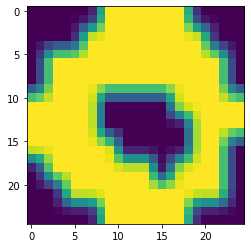

Class : 1


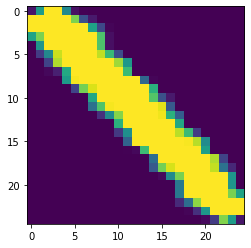

Class : 2


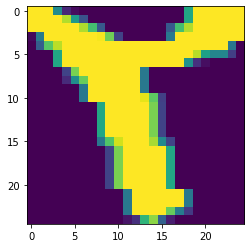

Class : 3


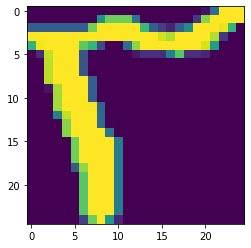

Class : 4


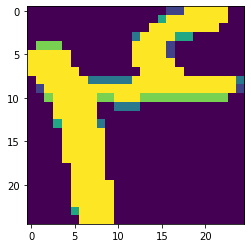

Class : 5


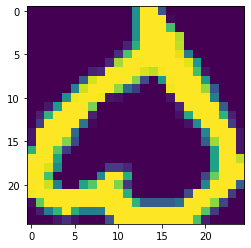

Class : 6


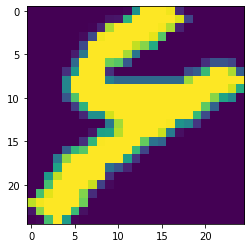

Class : 7


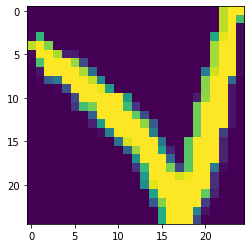

Class : 8


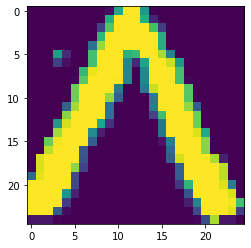

Class : 9


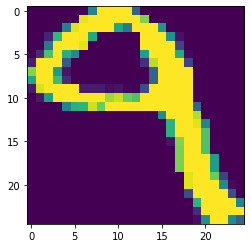

In [234]:
selectedFromClass = [False]*10
indexes = [0]*10
i = 0
for label in train_y:
    if selectedFromClass[int(label)] == False:
        selectedFromClass[int(label)] = True
        indexes[int(label)] = i
    if selectedFromClass == [True]*10:
        break
    i += 1
for index in indexes:
    print("Class :", train_y[index])
    plt.imshow(train_x[index])
    plt.show()

__Plotting Label Distributin in Tran and Test__

[0 1 2 3 4 5 6 7 8 9]
[7049, 7231, 6946, 7234, 7233, 7077, 7178, 7254, 7185, 7259]


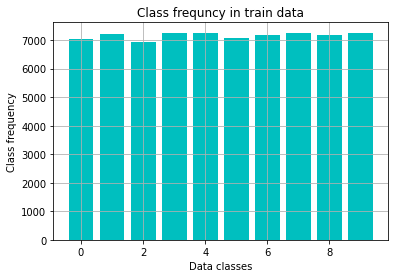

In [261]:
new_train = np.array(train_y)
ClassesInTrain = np.unique(new_train)
numberOfClassesInTrain = []
for i in ClassesInTrain:
    numberOfClassesInTrain.append(np.sum(new_train == i))
print(ClassesInTrain)
print(numberOfClassesInTrain)
plt.bar(ClassesInTrain, numberOfClassesInTrain, color='c')
plt.xlabel("Data classes")
plt.ylabel("Class frequency")
plt.title("Class frequncy in train data")
plt.grid()
plt.show()

[0 1 2 3 4 5 6 7 8 9]
[3021, 3099, 2977, 3100, 3100, 3033, 3076, 3109, 3079, 3112]


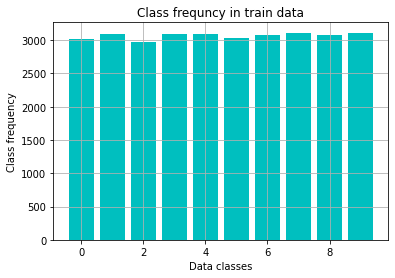

In [262]:
new_test = np.array(test_y)
ClassesInTrain = np.unique(new_test)
numberOfClassesInTrain = []
for i in ClassesInTrain:
    numberOfClassesInTrain.append(np.sum(new_test == i))
print(ClassesInTrain)
print(numberOfClassesInTrain)
plt.bar(ClassesInTrain, numberOfClassesInTrain, color='c')
plt.xlabel("Data classes")
plt.ylabel("Class frequency")
plt.title("Class frequncy in train data")
plt.grid()
plt.show()

__Normalizing Image Vectors__

The goal in normalization is to change the values to a single scale and it generally speeds up learning and leads to faster convergence.
<br>When inputs are of different scales, the weights connected to some inputs will be updated much faster than other ones 
<br>There are multiple benefits when normalizing data, one of them is that we don't let our gradients get out of control.

In [311]:
for i in range(len(train_x)):
    train_x[i] = train_x[i] / 255
    
for i in range(len(test_x)):
    test_x[i] = test_x[i] / 255

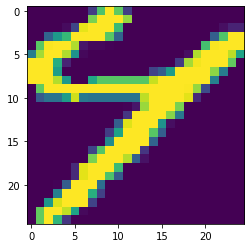

6
Max = 0.00392156862745098
Min = 0.0


In [238]:
choice = random.randint(0, len(train_x))
random_data = train_x[choice]
plt.imshow(random_data)
plt.show()
print(train_y[choice])
print(f'Max = {random_data.max()}')
print(f'Min = {random_data.min()}')

In [312]:
def image_array(data):
    array = []
    for index in range(len(data)):
        array.append(np.asarray(data[index]).flatten())
    return np.array(array)

temp = image_array(train_x)
train_x = pd.DataFrame(temp)
print("train")
print(train_x)

train_y = pd.DataFrame({'label': train_y})

temp = image_array(test_x)
test_x = pd.DataFrame(temp)
print("test")
print(test_x)

test_y = pd.DataFrame({'label': test_y})

train
       0    1    2    3         4         5    6    7         8         9    \
0      1.0  1.0  1.0  1.0  1.000000  1.000000  1.0  1.0  1.000000  0.839216   
1      0.0  0.0  0.0  0.0  0.000000  0.298039  1.0  0.0  0.000000  0.000000   
2      1.0  1.0  1.0  1.0  0.360784  0.000000  0.0  0.0  0.000000  0.239216   
3      0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
4      0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
...    ...  ...  ...  ...       ...       ...  ...  ...       ...       ...   
71641  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
71642  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
71643  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.039216  1.000000   
71644  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
71645  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.050980  0.172549   

       ...       615       616       617     

# Dataloader

In [313]:
from sklearn import preprocessing
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        
        onehot_vectors = list()
        for label in labels:
            onehot_vectors.append([0]* n_classes)
            onehot_vectors[len(onehot_vectors)-1][int(label)] = 1
        onehot_vectors = np.array(onehot_vectors)'''
        onehot_vectors = pd.DataFrame(preprocessing.OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        randomIndexes = np.random.permutation(self.__data.shape[0])
        self.__data = self.__data[randomIndexes] 
        self.__onehot_labels = self.__onehot_labels[randomIndexes]
        #self.__onehot_labels = self.__onehot_labels.iloc[randomIndexes]
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
                
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

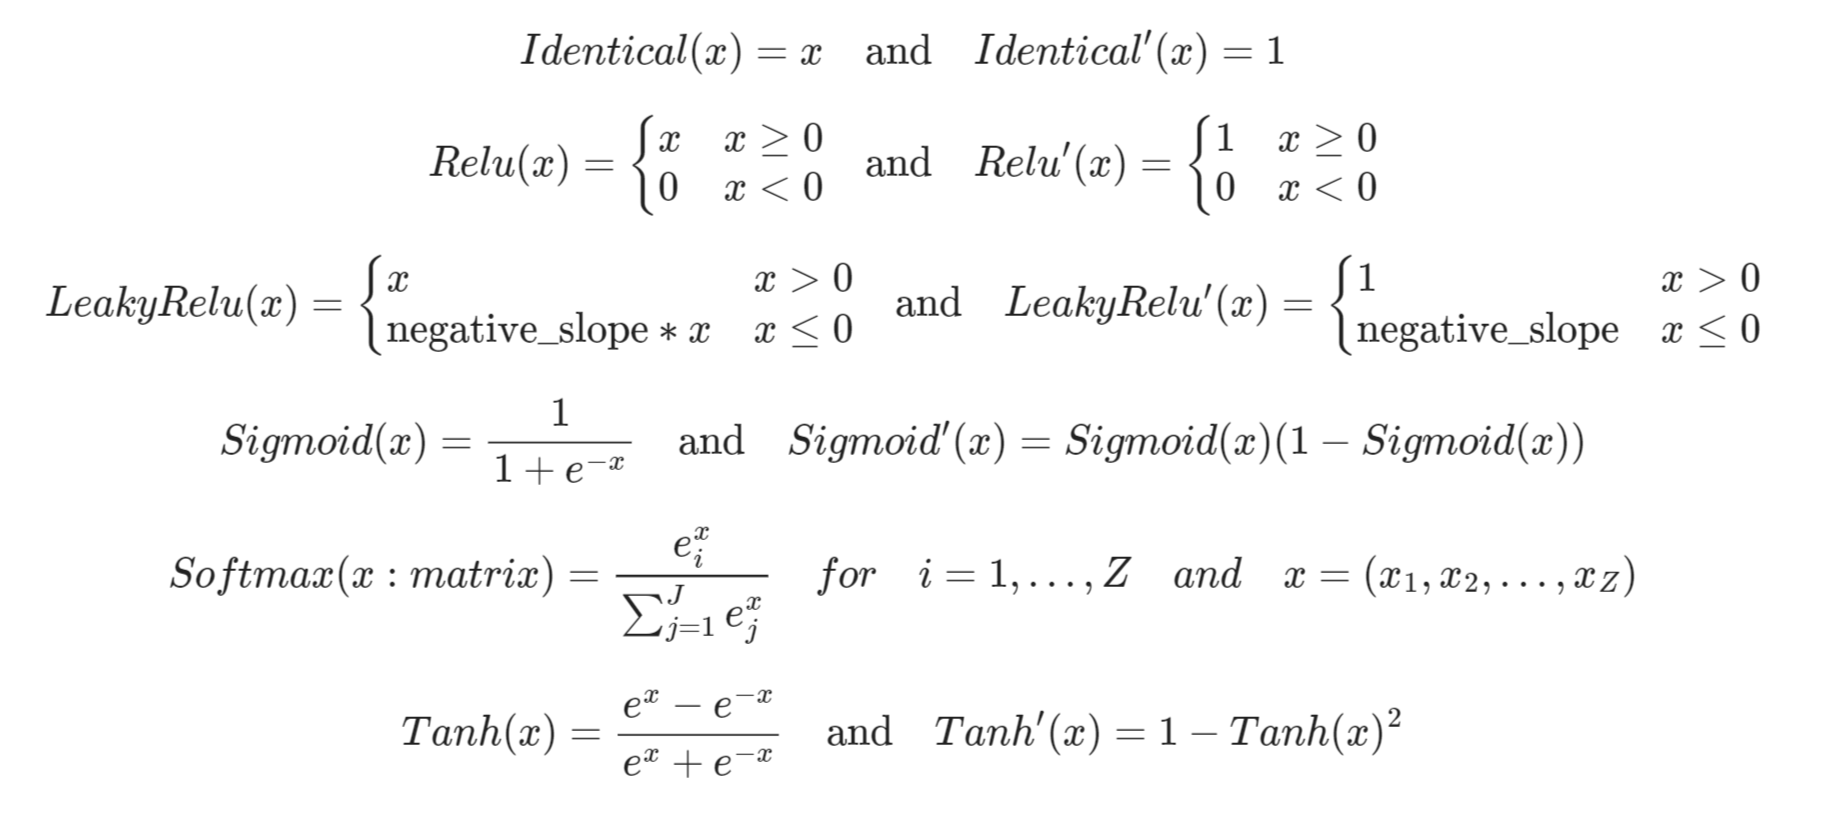

In [346]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = np.matrix(matrix, dtype=float)
        relu_value[relu_value<0] = 0
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative>0] = 1.
        relu_derivative[relu_derivative<0] = 0.
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp > 0, temp, temp * self.negative_slope))
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_derivative = np.where(temp >= 0, 1.0, self.negative_slope)
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = 1./(1. + np.exp(-temp))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid = 1./(1. + np.exp(-temp))
        sigmoid_derivative = np.multiply(sigmoid, (1-sigmoid))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        softmax_value = np.exp(temp - np.max(temp))
        softmax_value /= softmax_value.sum(axis=1)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(temp)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh = np.tanh(temp)
        tanh_derivative = 1 - np.power(tanh, 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

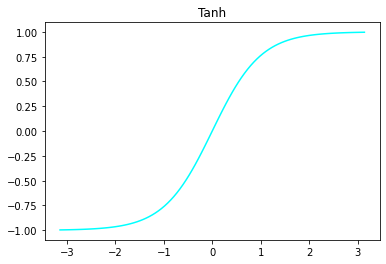

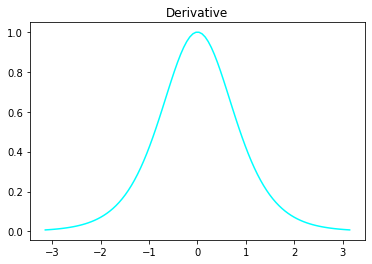

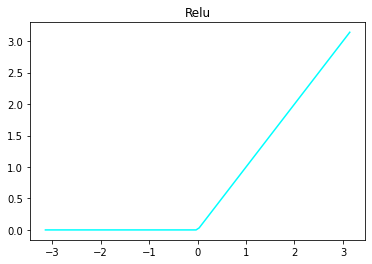

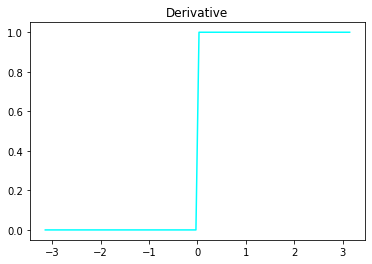

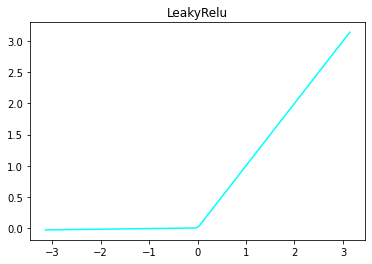

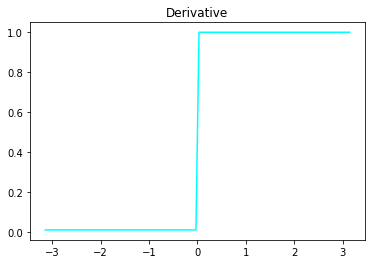

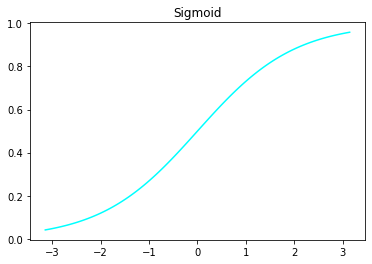

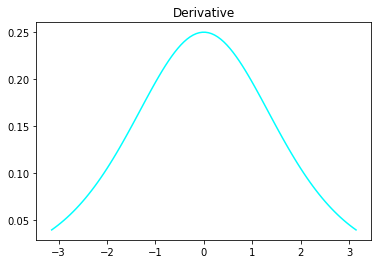

In [133]:
def plot_act_func(activation, name):
    test_span = np.linspace(-np.pi, np.pi, 100)
    test_span = np.array(test_span).reshape(1,100)
    diagram = activation(test_span)
    plt.plot(test_span[0], diagram[0], color = 'cyan')
    plt.title(name)
    plt.show()
    
    diagram = activation.derivative(test_span)
    plt.plot(test_span[0], diagram[0], color = 'cyan')
    plt.title("Derivative")
    plt.show()
    
plot_act_func(Tanh(), 'Tanh')    
plot_act_func(Relu(), 'Relu')
plot_act_func(LeakyRelu(), 'LeakyRelu')
plot_act_func(Sigmoid(), 'Sigmoid')

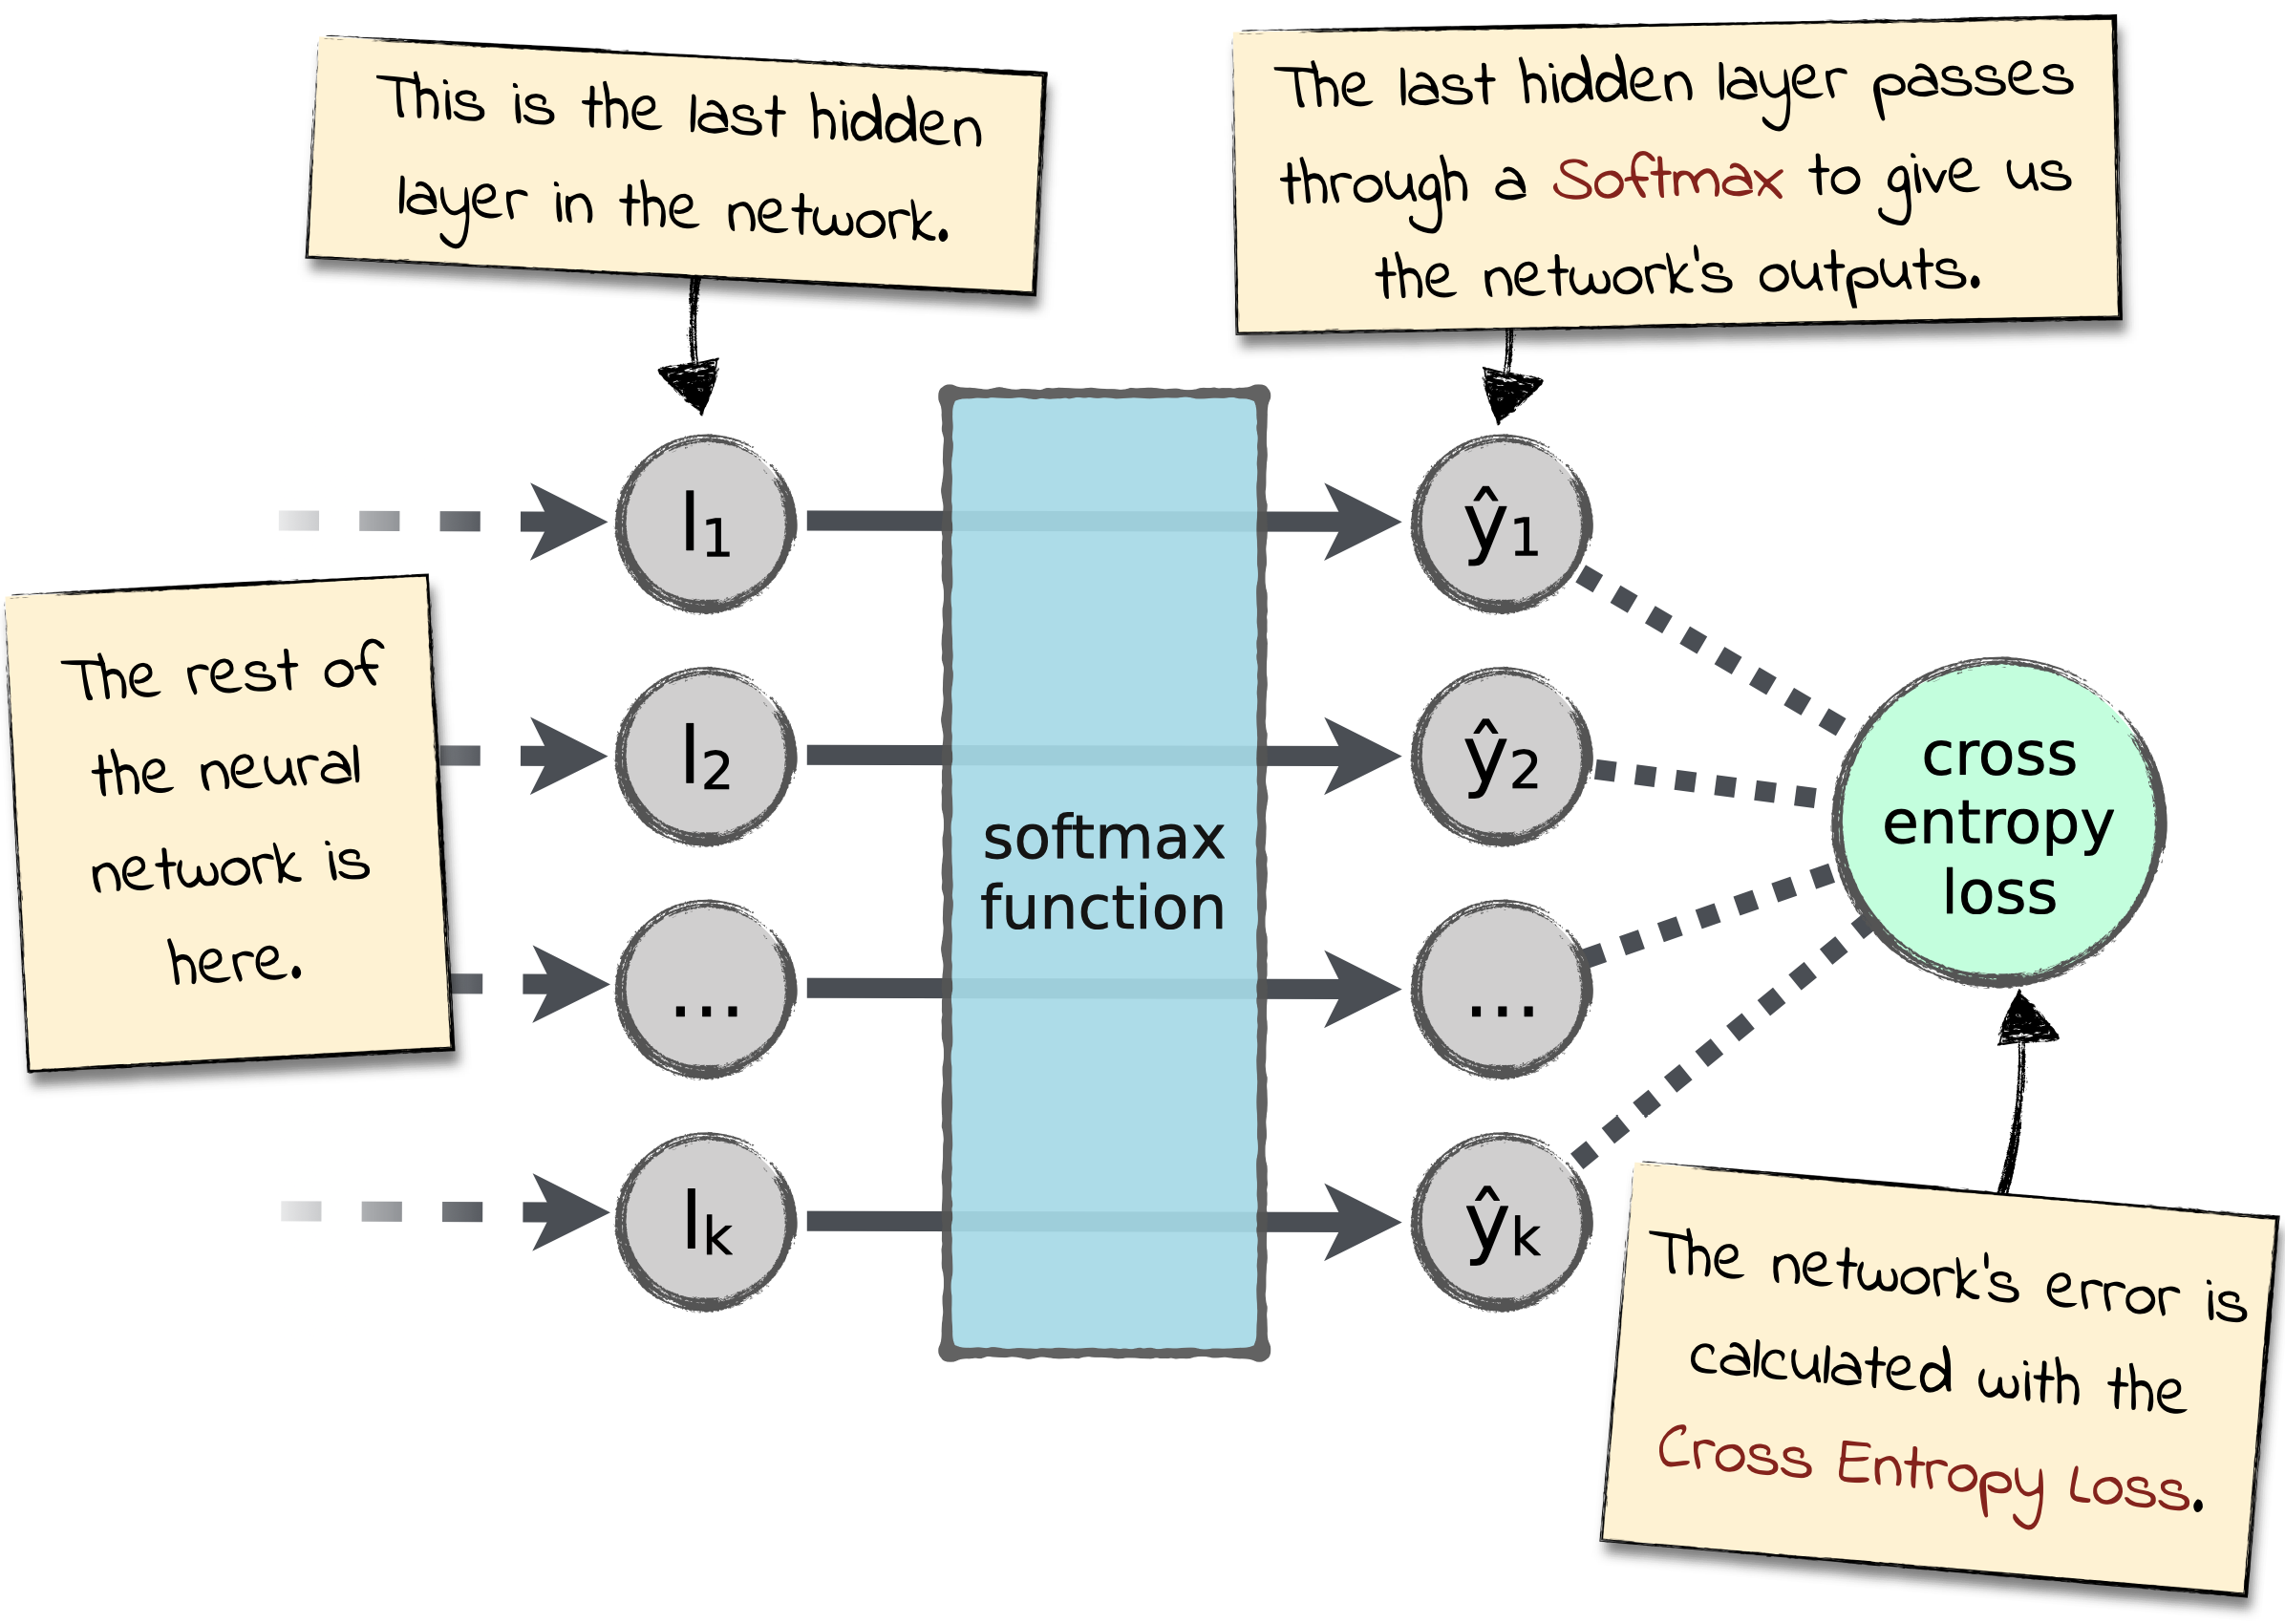

# Loss Function

In [315]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        expected_val_mat = np.matrix(expected_val, dtype=float)
        true_val_mat = np.matrix(true_val, dtype=float)
        val = softmax(true_val_mat)
        cross_entropy_value = -1 * np.sum(np.multiply(expected_val_mat, np.log(val)), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        softmax = Softmax()
        expected_val_mat = np.matrix(expected_val, dtype=float)
        true_val_mat = np.matrix(true_val, dtype=float)
        cross_entropy_derivative = softmax(true_val_mat) - expected_val_mat
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

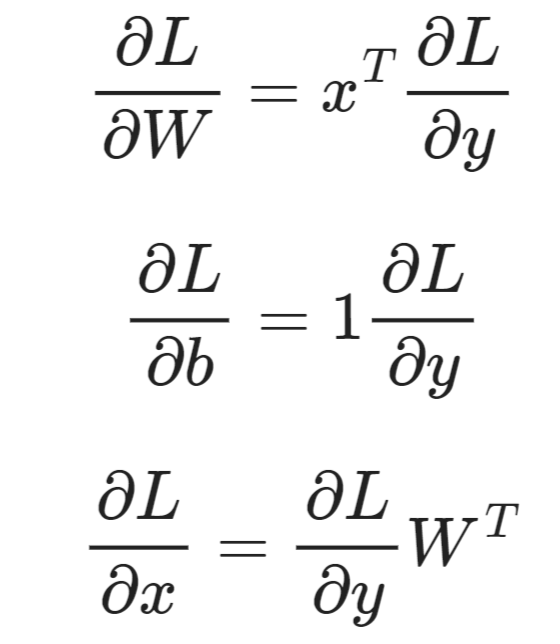

In [316]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        bias_mul = np.matrix(np.ones((np.size(backprop_tensor,0), 1)))
        derivation_of_L_to_Y = np.multiply(backprop_tensor, self.__last_activation_derivative) 
        derivation_of_L_to_W = np.matmul(np.transpose(self.__last_input), derivation_of_L_to_Y)
        derivation_of_L_to_B = np.matmul(np.transpose(bias_mul), derivation_of_L_to_Y)
        self.__weight -= lr * derivation_of_L_to_W
        self.__bias -= lr * derivation_of_L_to_B
        backprop_tensor = np.matmul(derivation_of_L_to_Y, np.transpose(self.__weight))
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.matrix(np.random.uniform(low=low, high=high, size=(dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(loc=mean, scale=math.sqrt(var), size=(dim1, dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [326]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        output = self.forward(x_batch)
        predicted_labels = self.__get_labels(output)
        true_labels = self.__get_labels(y_batch)
        batch_accuracy = self.__compute_accuracy(predicted_labels, true_labels)
        batch_average_loss = np.mean(self.__loss(predicted_labels, true_labels))
        self.__update_weights(output, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        output = self.forward(x_batch)
        predicted_labels = self.__get_labels(output)
        true_labels = self.__get_labels(y_batch)
        batch_accuracy = self.__compute_accuracy(predicted_labels, true_labels)
        batch_average_loss = np.mean(self.__loss(predicted_labels, true_labels))
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        #labels = outputs.argmax(1)
        labels = []
        for i in range(outputs.shape[0]):
            labels.append([])
            is_set = False
            max_prob = 0
            index = 0
            for j in range(outputs.shape[1]):
                labels[i].append(0)
                if is_set:
                    if max_prob < outputs[i,j]:
                        max_prob = outputs[i,j]
                        index = j
                else:
                    max_prob = outputs[i,j]
                    index = j
                    is_set = True
            labels[i][index] = 1
        labels = np.array(labels)
        labels = np.matrix(labels)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        accuracy = np.mean(output == expected_output)
        '''labels = self.__get_labels(output)
    
        correct_count = 0
        n = len(output)
        
        for i in range(n):
            if (expected_output[i, labels[i]] == 1):
                correct_count += 1
                
        accuracy = correct_count/n'''
        #accuracy = np.count_nonzero(output==expected_output) / np.size(output, 0) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backprop_tensor = self.__loss.derivative(output , y_train)
        for layer in reversed(self.__layers_list):
            backprop_tensor = layer.update_weights(backprop_tensor, self.__lr)
        return

# Phase 3: Classifying Data

## Part1 : 

# Training Sample Code

In [347]:
# Sample code for building and training a model

INPUT_SHAPE = 25*25
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

TRAINLOADER = [batch for batch in Dataloader(train_x, np.array(train_y["label"]).reshape(-1, 1), n_classes=10,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test_x, np.array(test_y["label"]).reshape(-1, 1), n_classes=10,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in true_divide


	Train: Average Accuracy: 0.8196830802441566	Average Loss: 2.362734770513692
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 2:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 3:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 4:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 5:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 6:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 7:
	Train: Average Accura

## Part2 : Weight  initialization:

__weights initially set to 0__
<br>If all the weights are initialized to zeros, the derivatives will remain same, therefore every neuron in the same layer has the same behavior, and will end up having the same weight. This problem is known as network failing to break symmetry
The same problem happens if the weights are initialized with a constant value for example all the weights are one and the biases are zero.

## Part3 : Learning Rate

- If learning rate is too big then the networks accuracy doesn't change. Also, bigger learning rates causes a problem called gradient vanishing and model may diverge and never find the optimal weight and biases.

- If rate is too small then the accuracy increases but the speed is extremly low thus the model needs more epochs to reach the same accuracy as the optimal learning rate.

In [338]:
max_accuracies = {}

lrs = [0.0005 + 0.0005*i for i in range(5)]

for lr in lrs:
    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
    network.add_layer(10, activation = Identical(), weight_initializer = 'uniform')
    network.set_training_param(loss=CrossEntropy(), lr=lr)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

    max_accuracies[lr] = {}
    max_accuracies[lr]['train_accuracy'] = log['train_accuracy'][-1]
    max_accuracies[lr]['test_accuracy'] = log['test_accuracy'][-1]

Epoch 1:


c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:253: RuntimeWarning: invalid value encountered in true_divide


	Train: Average Accuracy: 0.8198086943576002	Average Loss: 2.3621066999464744
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 2:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 3:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 4:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 5:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 6:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 7:
	Train: Average Accur

In [339]:
max_accuracies

{0.0005: {'train_accuracy': 0.8196774973946701,
  'test_accuracy': 0.8196730324074074},
 0.001: {'train_accuracy': 0.8196774973946701,
  'test_accuracy': 0.8196730324074074},
 0.0015: {'train_accuracy': 0.8196774973946701,
  'test_accuracy': 0.8196730324074074},
 0.002: {'train_accuracy': 0.8196774973946701,
  'test_accuracy': 0.8196730324074074},
 0.0025: {'train_accuracy': 0.8196774973946701,
  'test_accuracy': 0.8196730324074074}}

In [348]:
LEARNING_RATE = 0.001

## lr*10

In [351]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE*10)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in true_divide


	Train: Average Accuracy: 0.819674705969927	Average Loss: 2.3627766418848397
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 2:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 3:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 4:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 5:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 6:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 7:
	Train: Average Accura

## lr*0.1

In [352]:
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE*0.1)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.9118968661604884	Average Loss: 1.9016658409320335
	Test: Average Accuracy: 0.9665784143518519	Average Loss: 1.6282580999752154
Epoch 2:
	Train: Average Accuracy: 0.975767455709394	Average Loss: 1.5823128931875048
	Test: Average Accuracy: 0.9802813946759258	Average Loss: 1.559743198354845
Epoch 3:
	Train: Average Accuracy: 0.984272740806908	Average Loss: 1.539786467699936
	Test: Average Accuracy: 0.9855157696759259	Average Loss: 1.5335713233548451
Epoch 4:
	Train: Average Accuracy: 0.9871088283459878	Average Loss: 1.5256060300045364
	Test: Average Accuracy: 0.987468894675926	Average Loss: 1.5238056983548451
Epoch 5:
	Train: Average Accuracy: 0.9884235894000298	Average Loss: 1.5190322247343264
	Test: Average Accuracy: 0.9884975405092593	Average Loss: 1.5186624691881785
Epoch 6:
	Train: Average Accuracy: 0.9892442682745272	Average Loss: 1.5149288303618387
	Test: Average Accuracy: 0.989207175925926	Average Loss: 1.515114292104845
Epoch 7:
	Train: Averag

## Part 4 : Activation Function

__Advantages of Leaky Relu over Relu:__
- It fixes the “dying ReLU” problem because it doesn’t have 0 slope(for the negative part).
- Leaky ReLU is a bit more balanced(also the negative values are near 0) so the overall training time of the model is low.
- Leaky Relu is faster both in convergence and its computation.


__Why Sigmoid and Tanh are not good__
<br>with sigmoid we have the problem of vanishing gradient, which means the derivatives become smaller and smaller untill they vanish (underflow). It makes neural networks inefficient. This problem exists for both sigmoid and tanh. However, it is less prominent in tanh.
<br>Since the state of the art of for Deep Learning has shown that more layers helps a lot, then this disadvantage of the Sigmoid function is a game killer. You just can't do Deep Learning with Sigmoid

## Sigmoid
The sigmoid function normalizes the values(all of them are between 0 and 1). But when x(exp power) is a large positive or negative value, it'll decrease to 0.
Also, it's more computationally expensive than other functions.

In [354]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(40, input_shape=INPUT_SHAPE, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.8198669420872413	Average Loss: 2.3618154612982685
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 2:
	Train: Average Accuracy: 0.8201042131904124	Average Loss: 2.360629105782413
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 3:
	Train: Average Accuracy: 0.8630236712818222	Average Loss: 2.1460318153253635
	Test: Average Accuracy: 0.9349782986111111	Average Loss: 1.7862586786789192
Epoch 4:
	Train: Average Accuracy: 0.9678844722346285	Average Loss: 1.6217278105613324
	Test: Average Accuracy: 0.9792657696759259	Average Loss: 1.5648213233548451
Epoch 5:
	Train: Average Accuracy: 0.9836562081286289	Average Loss: 1.542869131091331
	Test: Average Accuracy: 0.9850260416666666	Average Loss: 1.5360199634011413
Epoch 6:
	Train: Average Accuracy: 0.9870868691380079	Average Loss: 1.525715826044435
	Test: Average Accuracy: 0.9875130208333334	Average Loss: 1.523585067567808
Epoch 7:
	Train: Avera

## Hyperbolic Tangent
This function normalizes the values in between -1 and 1 thus it's a zero centered function.

In [355]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(40, input_shape=INPUT_SHAPE, activation=Tanh(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.8199283534315914	Average Loss: 2.3615084045765173
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 2:
	Train: Average Accuracy: 0.8199283534315914	Average Loss: 2.3615084045765173
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 3:
	Train: Average Accuracy: 0.8199311448563347	Average Loss: 2.3614944474528015
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 4:
	Train: Average Accuracy: 0.8199311448563347	Average Loss: 2.3614944474528015
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 5:
	Train: Average Accuracy: 0.8199339362810778	Average Loss: 2.3614804903290856
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 6:
	Train: Average Accuracy: 0.8199339362810778	Average Loss: 2.3614804903290856
	Test: Average Accuracy: 0.8201822916666667	Average Loss: 2.360238713401141
Epoch 7:
	Train: Avera

## Leaky Relu
Leaky Relu is faster both in convergence and its computation. The problem is that it's not consistent.
Leaky Relu has a slope for negative values while Relu deletes these values.

In [353]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(40, input_shape=INPUT_SHAPE, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


c:\users\mahsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in true_divide


	Train: Average Accuracy: 0.819644000297752	Average Loss: 2.3629301702457153
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 2:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 3:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 4:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 5:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 6:
	Train: Average Accuracy: 0.8196774973946701	Average Loss: 2.362762684761124
	Test: Average Accuracy: 0.8196730324074074	Average Loss: 2.3627850096974377
Epoch 7:
	Train: Average Accura

## Part 5 : Batch Size Impact
The batch size defines the number of samples that will be propagated through the network.

<br>If we have a huge data set then we have to load the whole data set into the memory so the training speed of the model will be very slow because we are using a lot of memory in our CPU which is very inefficient. If we use smaller batch sizes ,it requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory.

<br>Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

<br>A __small batch__ size, increases the number of forward/backward propagations, leading to a slower neural network and is not guaranteed to converge to the global optima. Also it leads to a higher variance, due to smaller number of training samples.But It takes less memory and it is more generalized and has better accuracy overall.

__batch size = 16__
- Model trains slow because data is in small batches.
- The accuracy has come better.

In [334]:
BATCH_SIZE = 16

TRAINLOADER = [batch for batch in Dataloader(train_x, np.array(train_y["label"]).reshape(-1, 1), n_classes=10,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test_x, np.array(test_y["label"]).reshape(-1, 1), n_classes=10,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(40, input_shape=INPUT_SHAPE, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.823079499776686	Average Loss: 2.3457526728510447
	Test: Average Accuracy: 0.8368229166666666	Average Loss: 2.2770355884011413
Epoch 2:
	Train: Average Accuracy: 0.9056777579276463	Average Loss: 1.932761382096244
	Test: Average Accuracy: 0.9778906250000001	Average Loss: 1.5716970467344746
Epoch 3:
	Train: Average Accuracy: 0.983036511835641	Average Loss: 1.5459676125562707
	Test: Average Accuracy: 0.9868229166666668	Average Loss: 1.5270355884011413
Epoch 4:
	Train: Average Accuracy: 0.9888705895489058	Average Loss: 1.5167972239899465
	Test: Average Accuracy: 0.9901171875	Average Loss: 1.5105642342344747
Epoch 5:
	Train: Average Accuracy: 0.9907185127288969	Average Loss: 1.507557608089991
	Test: Average Accuracy: 0.9911979166666668	Average Loss: 1.5051605884011414
Epoch 6:
	Train: Average Accuracy: 0.9915643144260832	Average Loss: 1.50332859960406
	Test: Average Accuracy: 0.9917838541666667	Average Loss: 1.5022309009011414
Epoch 7:
	Train: Average Acc

__batch size = 256__
- Model trains fast.
- The accuracy is bad.

In [335]:
BATCH_SIZE = 256

TRAINLOADER = [batch for batch in Dataloader(train_x, np.array(train_y["label"]).reshape(-1, 1), n_classes=10,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test_x, np.array(test_y["label"]).reshape(-1, 1), n_classes=10,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(40, input_shape=INPUT_SHAPE, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.8197604468307592	Average Loss: 2.3623479375806773
	Test: Average Accuracy: 0.8202747288223141	Average Loss: 2.359776527622904
Epoch 2:
	Train: Average Accuracy: 0.8362649312258688	Average Loss: 2.2798255156051304
	Test: Average Accuracy: 0.8389314845902204	Average Loss: 2.266492748783372
Epoch 3:
	Train: Average Accuracy: 0.9165920105373232	Average Loss: 1.878190119047859
	Test: Average Accuracy: 0.9456315642217631	Average Loss: 1.7329923506256586
Epoch 4:
	Train: Average Accuracy: 0.9681168808317246	Average Loss: 1.6205657675758514
	Test: Average Accuracy: 0.9772160167011018	Average Loss: 1.5750700882289645
Epoch 5:
	Train: Average Accuracy: 0.9802773336953023	Average Loss: 1.5597635032579624
	Test: Average Accuracy: 0.9805374591081268	Average Loss: 1.5584628761938404
Epoch 6:
	Train: Average Accuracy: 0.9839301047699487	Average Loss: 1.5414996478847318
	Test: Average Accuracy: 0.9850782326101928	Average Loss: 1.53575900868351
Epoch 7:
	Train: Aver